## ShopSpectra Marketing A/B Testing

Scenario: ShopSpectra, an online retail company, wants to determine if targeted advertisements increase conversion rate as compared to showing their current public service announcements (PSAs) or nothing at all. They are hopeful to see a **2%** change in conversion from **1%** to **3%**. To do this, they run an A/B test to measure the impact of showing Ads or PSAs on the conversion rate. Essentially, conversion or no conversion means whether people end up buying a product or not. 

Purpose: The aim is to find if showing the targeted ads created any impact. In other words, was the campaign successful? And if successful, what is the measured impact?

There are total 6 steps in this A/B testing process:
1. State Business Hypothesis, Select Primary Metric and State Statistical Hypothesis
2. Perform Power Analysis, find Minimum Sample Size and Test Duration
3. Run the experiment and Collect the data
4. Analyze + Visualize the data
5. Test the hypothesis
6. Draw the conclusion

Let's begin !

### Step 1: State Business Hypothesis, Select Primary Metric and State Statistical Hypothesis


1. Business Hypothesis: Showing ads will increase the conversion rate of customers. 

2. Primary Metric selected:  P = Conversion Rate

3. Statistical Hypothesis: Given P(Ad) = conversion rate when Ads are shown and P(PSA) = conversion rate when PSA or nothing is shown
                        
```python
Ho: Conversion rate of PSA or nothing is SAME as when showing Ads          => P(PSA) = P(Ad) 
Ha: Conversion rate of PSA or nothing is NOT SAME as when showing Ads      => P(PSA) != P(Ad)
```

4. Choosing Variables:\
\
    Independent Variable: We have two groups represented by the variable (or column) "test group" \
        1. Control Group - Nothing or only PSA is shown to this group. The columm value is "psa" in this case. \
        2. Experimental Group - Ads are shown to this group. The column value is "ad" in this case.          
\
    Dependent Variable: "converted" or the conversion rate. This is a binary variable with two value:\
        1. True if the conversion occurs.\
        2. False if the conversion does not occur.

                 

### Step 2: Perform Power Analysis, find Minimum Sample Size and Test Duration

In this, step we find the value of the five required variables:

- Significance Level OR alpha
- Statistical Power OR 1 - beta
- Minimum Detectable Change OR delta
- Minimum Sample Size
- Test Duration


Let's understand each of them one-by-one.


#### 1. Significance Level OR alpha

Significance Level for this experiment: alpha = 5% OR CI = 95% (standard)

Alpha (α) represents the significance level of the A/B test. It is the probability of rejecting the null hypothesis (Ho) when it is actually true. In other words, it measures the likelihood of a Type I error — a false positive.

Common values for alpha are 0.05 or 0.01, meaning a 5% or 1% chance of incorrectly rejecting the null hypothesis.

If α = 0.05, there is a 5% chance that we will conclude that the difference between the control and experimental groups is statistically significant when, in fact, there is no real difference (false positive). This represents our tolerance for the risk of finding a difference that doesn't actually exist.


#### 2. Statistical Power OR 1 - beta

Statistical Power for this experiment: beta = 20% , 1- beta = 80% (standard)

Statistical Power or (1-β) is known as the statistical power of the A/B test. It represents the probability of correctly rejecting the null hypothesis when it is false. In other words, it’s the likelihood of detecting a true effect (difference) if it exists. Beta (β) represents the probability of a Type II error — a false negative.

Statistical Power is usually set to 0.8 (80%), meaning there’s an 80% chance of detecting a real difference between the control and experimental groups if one exists.

If 1-β = 0.80, there’s an 80% chance that the test will correctly identify a real difference between the groups, and only a 20% chance of missing that difference (false negative). Higher power means the test is more likely to detect meaningful effects, especially if the sample size is adequate.


#### 3. Minimum Detectable Change or delta

Here, delta = 2%, that means if a 2% change is observed, the results are practically significant to implement the new Ad strategy. But we cannot use 2% directly as effect size. It requires one additional step where we calculate proportional sample size before we get proportion effect size. To understand this, first let's understand types of effect size.

**Types of Effect Size**

Effect size can either be **Absolute** or **Relative**.

Relative Effect Size means the difference % between the new and old value i.e. (New Value - Old Value)/Old Value * 100. It used for scenarios where we test whether the avg value between two group is different or not. Example: average order value differs between two groups, average session time between users shown two different page layouts. In this scenario, Relative Effect Size is (3 - 1)/2 *100 = 100%
    
Absolute Effect Size means the direct difference in metric i.e. New value - Old Value. It is used when the primary metric has binary outcome. Example: whether the conversion rate (e.g., the percentage of users making a purchase) differs between two groups, click-through rate (CTR) between users who see different ads. In this scenario, Absolute Difference is 3% - 1% = 2%. 


**The Additional Step**

Before feeding effect size to the main function that calculates sample size, we do an additional step of calculating proportional effect size. We use **proportion_samplesize()** from **statsmodels module** to get proportional effect size **before calculating Sample Size**.

- When **relative effect size** is given, then we need to calculate the absolute measure from it i.e. get the old and new metric values so that you can use those in the **proportion_samplesize()** function.

- When **absolute effect size** is given, then we can use those values directly in the **proportion_samplesize()** function. 

**But why this additional step?**

- Absolute difference alone doesn’t account for the variability and distribution of the data. For example, going from 10% to 15% (5 percentage points difference) has a different impact than going from 50% to 55%, even though the absolute difference is the same.

- proportion_effectsize() standardizes the difference between proportions, making the sample size calculation more accurate by considering the variability at different baseline rates.

- This ensures that your A/B test has enough power to detect a statistically significant effect.






#### 4. Sample Size

It is not possible to test the whole audience base (the population) therefore, we need take sample from the population. It is important to realize that what we find based on the sample group represnts only the estimates of actual conversion rate and not the conversion rate itself.

To calculate sample size, we will use all the above variable values. We can do this very well in Python itself or use online calculators.
\
1. In Python, one way is to use two functions that belong to statsmodel library:

    When the **primary metric you're testing is a proportion or binary outcome**, such as conversion rate, click-through rate (CTR), or any yes/no outcome, first use
    ```python
            proportion_effectsize(baseline_rate== --, target_rate== --)
    ```
    followed by
    
    ```python
            NormalIndPower().solve_power(effect_size= --, power= --, alpha= -- , ratio= -- )
    ```
    
    When the **primary metric you're testing is a continuous variable**, such as average purchase amount, time spent on the website, or average click-through rate duration, use
    ```python
            proportion_effectsize(baseline_rate== --, target_rate== --)
    ```
    followed by
    ```python
            tt_ind_solve_power(effect_size= --, nobs1= --, alpha= --, power= --, ratio= --)
    ```

 2. Another way is to use online calculators like ABTasty calculator.

In [1]:
# import libraries needed for the whole experiment

## libraries for stats calculations
import scipy.stats as stats
import statsmodels.stats.api as sms # check if needed
from math import ceil

## libararies for data analysis
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Sample size calcuation

delta = sms.proportion_effectsize(0.13, 0.15)

required_sample_size = sms.NormalIndPower().solve_power(
    effect_size = delta,
    power = 0.8,
    alpha = 0.05,
    ratio=1 )

required_sample_size = ceil(required_sample_size) 
#ceil is necessary to use so that the value is converted to int type for using it in other funnctions as input.

required_sample_size

4720

So, we need minimum 4720 samples to see the desired effect.

Therefore, we need 4720 observations for both control group and experimental group each. Total observation will be 9440.

#### 5. Test Duration

For this experiment, the test data is already collected so this is not significant. However, in real-world scenario, calculating this variable gives an estimate of how long the experiment should run to collect the desired samples. 

**Test Duration = Required Sample Size for each group / Daily Traffic per variant**

Total Required Sample Size for each group is 4720.  
Let's assume that daily avg traffic is 1000.Then Daily Traffic per variant = 1000 / 2 = 500.  
Test Duration = 4720 / 500 = 9.44


Therefore, in approximately 10 days, we will be able to collect 4720 samples for both control and experimental group each at the same time. 

### Step 3: Run the experiment and Collect the data

Now that we have the sample size, we go ahead and collect data. At this point, in an actual project, you will work with your team to set up the experiment and make sure that enough data is collected.

For this case, I am using a dataset that I found on Kaggle that has 588,101 observations. So, I will take a random sample of 4720 observations for both control and experimental group each to duplicate the experiment conditions. This means that the sample should have 4720 observations with "test group" = ad and 4720 observations with "test group" = psa.

[Click here](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data) to download the dataset from Kaggle.



First, let's make sure we have the clean and correct data. To do so, we will follow the given below steps:

1. Clean the dataset. Drop any unwanted columns.
2. Remove duplicates. Check for duplicate users and if any are found, remove them from the dataset.
3. Perform sampling. As mentioned above, this is a downloaded dataset so to follow the experiment conditions, I will perform sampling to ensure we have the desired sample size. 


In [3]:
# Read the data

df = pd.read_csv("/Users/maatoka/Tech Projects/Datasets/marketing_AB.csv")
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

#### Step 3.1 : Clean the dataset

In [6]:
# Dropping the columns that are needed. 
# Here, our primary metric is conversion rate so I will only keep columns (user id, test group, converted).

df.drop(['Unnamed: 0','total ads', 'most ads day', 'most ads hour'], axis=1, inplace= True)

df.head()


,user id,test group,converted
0,1069124,ad,False
1,1119715,ad,False
2,1144181,ad,False
3,1435133,ad,False
4,1015700,ad,False


In [7]:
# Let's see how the data looks like. Let's see count of observations for each group.

df.groupby('test group').count()[['user id']]


,user id
test group,
ad,564577
psa,23524


There are 564,577 customers that saw the Ad and 23,524 customers who saw PSA or nothing at all.

#### 3.2 Remove duplicates

Before sampling, let's make sure to remove duplicate user ids. We need to remove them so that they are not sampled multiple times.

In [8]:
# removing duplicates

#df.duplicated(subset = ['user id']).sum() -> gives duplicate user ids

# another way of couting the duplicate users.
user_count = df['user id'].value_counts(ascending = False)
duplicate_users = user_count[user_count > 1].count()
print(f"There are {duplicate_users} users that apear more than once in the dataset.")


There are 0 users that apear more than once in the dataset.


**Note:**
Here, there are no duplicates so we are good to go aheah and perform sampling. If there are duplicate users, use the following code:

```python
drop_users = user_count[user_count > 1].index
df = df[~df['user_id'].isin(users_to_drop)]
print(f'The updated dataset now has {df.shape[0]} entries')

#### Step 3.3: Perform Sampling

Now we have clean data with only the required columns. Next, we can go ahead and sample 4720 observations for each group. 

For random sampling, since this is a dataframe and not general sampling, we will use dataframe.sample() method.

In [9]:
control_sample = df[df['test group']== 'psa'].sample(n=required_sample_size, random_state= 88)
control_sample 

,user id,test group,converted
165387,918123,psa,False
145147,917901,psa,False
154972,912483,psa,True
545980,905854,psa,False
549532,913535,psa,False
...,...,...,...
61614,902508,psa,False
385162,918147,psa,False
578610,904136,psa,False
541125,900138,psa,False


In [10]:
experimental_sample = df[df['test group']== 'ad'].sample(n=required_sample_size, random_state= 88)
experimental_sample 

,user id,test group,converted
154870,1228623,ad,False
34958,1536273,ad,False
200581,1554524,ad,False
30715,1067171,ad,False
400732,1283830,ad,False
...,...,...,...
38246,1132763,ad,True
103349,1347359,ad,False
489076,1230522,ad,False
453161,1034140,ad,False


In [11]:
# Concatenate the two samples to create our testing dataset. Remember to concatenate horizontally.

test_data = pd.concat([control_sample, experimental_sample], axis = 0) # axis = 0 means merge rows. 


In [12]:
test_data.head()

,user id,test group,converted
165387,918123,psa,False
145147,917901,psa,False
154972,912483,psa,True
545980,905854,psa,False
549532,913535,psa,False


So now we have our test dataset in a dataframe "test_data" with only required number of observations. Now we can go ahead and analyze the data to find any insights.

### Step 4: Analyze + Visualize the data

In this step, we will find the value of the parameters that help us to compare the results of the two sample groups.

According to Center Limit Theorem (CLT), the means of any two samples follow normal distribution even if the population may or may not be normally distributed.

To compare the two samples, we calculate some statistic measures such as the sample mean & sample standard deviation.


In [13]:
test_data.head()

,user id,test group,converted
165387,918123,psa,False
145147,917901,psa,False
154972,912483,psa,True
545980,905854,psa,False
549532,913535,psa,False


In [14]:
# basic statistics measures
test_data.groupby(['test group']) [['converted']].agg(['mean', 'std', 'sem'])


converted                    
                mean       std       sem
test group                              
ad          0.025000  0.156141  0.002273
psa         0.015678  0.124239  0.001808

Looking at the value of basic statistic measures, it seems the conversion rate for experimental group is more, 2.5% vs 1.5%. Let's also plot the mean value for a clear comparison. 

Text(0.5, 1.0, 'Comparing Mean Conversion Rate by Group')

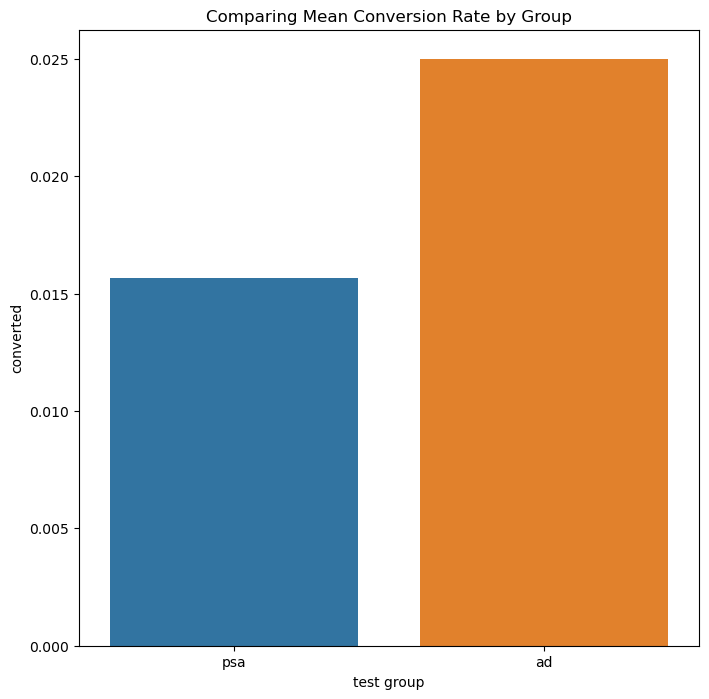

In [15]:
# Visualizing the mean of the control and experimental group

plt.figure(figsize = (8,8))

sns.barplot(x = test_data['test group'], y = test_data['converted'], ci=False)
plt.title("Comparing Mean Conversion Rate by Group")

As we can see, the experimental group has clearly performed better. But the real question is **if this difference in the conversion rate from the two groups statistically significant?**

### 5. Test the hypothesis

We are now at the most important stage of our A/B testing process. In this stage, we will test our hypothesis using suitable statistical tests in the attempt to find out if the difference in the conversion rate observed is statistically significant. 

To do so, we will do the following:\
    1. Choose the appropriate test based on 
    (i) # of Samples  (ii) Type of Metric Variable (iii) Direction of comparison (iv) Statistical test\
    2. Choose the appropriate Python library to perform the test.\
    3. Find the p-value that represents the difference in the performance. 

Here, we have 
- **two independent samples (control & experimental)**
- the primary metric represents **proportion or is categorical in nature**
- direction of comparison is two-tailed

Therefore, our test options for proportions tests are:
1. z-test to find z-statistic & p-value | Because population variance is known & sample size is greater than 30.
2. Chi2 test for independence to find chi2 value & p-value | Because we have two variables "test group" and "converted"(contingency tab)  



In [16]:
# z-test

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [17]:
alpha = 0.05
control_data = test_data[test_data['test group'] == 'psa']['converted']
experimental_data = test_data[test_data['test group'] == 'ad']['converted']


In [18]:
# Get count of successesful conversions
converted_yes = [control_data.sum(), experimental_data.sum()]

# Get count of observations
count_total_obs = [control_data.count(), experimental_data.count()]

# z-test stats functions for proportions
# ---> proportions_ztest(successful count in each group, total count in each group)

z_statistic, p_value = proportions_ztest(converted_yes, count_total_obs)


print(f"z_statistic: {z_statistic}")
print(f"p_value: {p_value} \n")


#Check for signifincance & draw conclusion
if p_value < alpha:
    print("The p-value is less than 0.05 which implies that the differene is statistically significant. So we reject Null Hypothesis.")
else:
    print(print("The p-value is more than 0.05 which implies the differene is not statistically signifianct. So we fail to reject Null Hypothesis."))


z_statistic: -3.2082200507270344
p_value: 0.0013355926576500159 

The p-value is less than 0.05 which implies that the differene is statistically significant. So we reject Null Hypothesis.


In [19]:
# Chi2 test

from scipy.stats import chi2_contingency

alpha = 0.05
contingency_tab = pd.crosstab(test_data['test group'], df['converted'])
contingency_tab

converted,False,True
test group,,
ad,4602,118
psa,4646,74


In [20]:
chi2, p, _, _ = chi2_contingency(contingency_tab)

print(f"Chi2 value: {chi2}")
print(f"p-value: {p} \n")


#Check for signifincance & draw conclusion
if p < alpha:
    print("The p-value is less than 0.05 which implies that the differene is statistically significant. So we reject Null Hypothesis.")
else:
    print(print("The p-value is more than 0.05 which implies the differene is not statistically signifianct. So we fail to reject Null Hypothesis."))

Chi2 value: 9.8301434544406
p-value: 0.0017167495916502876 

The p-value is less than 0.05 which implies that the differene is statistically significant. So we reject Null Hypothesis.


### 6. Draw the conclusion

Based on the results of the z-test and chi-squared test, both of which produced p-values less than the significance level of alpha = 0.05, we reject the null hypothesis (Ho). This indicates that exposure to ads has a statistically significant impact on conversion rates, with a proven 2% increase.

These findings provide a solid foundation for the ShopSpectra marketing team to make informed, data-driven decisions in designing targeted ad campaigns.